# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



## 1. Problem Definition

   In this project,on the basis of the medical features, we predict whether a patient has a heart                disease or not.

## 2. Data
   The original data came from the Cleavland data from the UCI Machine Learning Repository.  https://archive.ics.uci.edu/ml/datasets/heart+Disease

   There is also a version of it available on Kaggle.
   https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

We'll pursue the project at higher accuracy of about 85% and above.

## 4. Features
 These are the features available for our prediction:

Let's create a data dictionary:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * Atypical angina: chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart related)
    * Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) 
(1 = true; 0 = false) '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * Nothing to note
   * ST-T Wave abnormality can range from mild symptoms to severe problems
   * Signals non-normal heart beat
   * Possible or definite left ventricular hypertrophy
   * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * Upsloping: better heart rate with excercise (uncommon)
    * Flatsloping: minimal change (typical healthy heart)
    * Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# 5. Modelling
Since this is a classification problem, we will only the classification models. We'll compare any three models and try to find which model will perform best for this problem.

# 6. Experimentation
Under the experimentation, we search for other possible ways to improvise our model.


In [1]:
#Importing the basic tools and libraries.

#Primary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Interpreting 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split,cross_val_score

#warnings ignoring
import warnings
warnings.filterwarnings('ignore')

#  Exploratory Data Analysis

In [2]:
#Importing the data
data=pd.read_csv('/home/dinesh/Desktop/csv files/heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Shape of the data
data.shape

(303, 14)

In [4]:
#checking count of missing values in each column
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#Info about the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


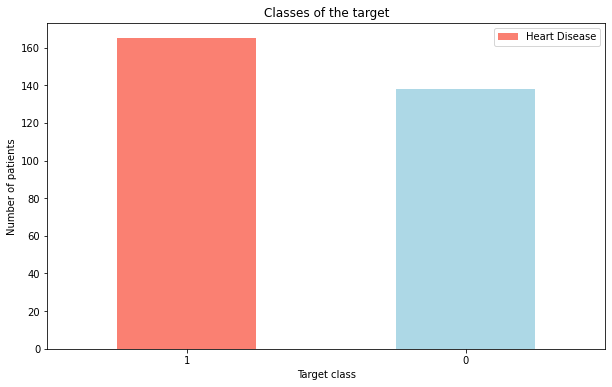

In [6]:
#bar plot of the classes in target column
plt.figure(figsize=(10,6))
data['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])
plt.title('Classes of the target')
plt.xlabel('Target class')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)
plt.legend(['Heart Disease','No heart Disease']);

In [7]:
#Sex column counts

data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
#Relation of Sex column with target column
pd.crosstab(data.target,data.sex)


sex,0,1
target,,
0,24,114
1,72,93


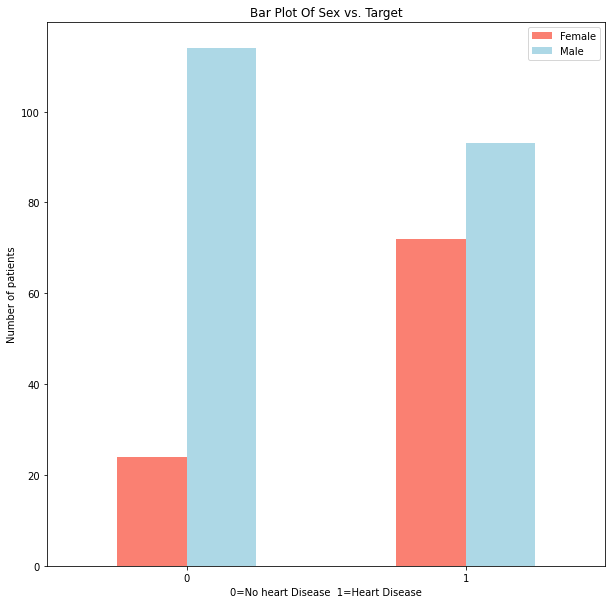

In [9]:
#Plotting the crosstab
pd.crosstab(data.target,data.sex).plot(kind='bar',figsize=(10,10),color=['salmon','lightblue'])
plt.title('Bar Plot Of Sex vs. Target')
plt.xlabel('0=No heart Disease  1=Heart Disease')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)
plt.legend(['Female','Male']);

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


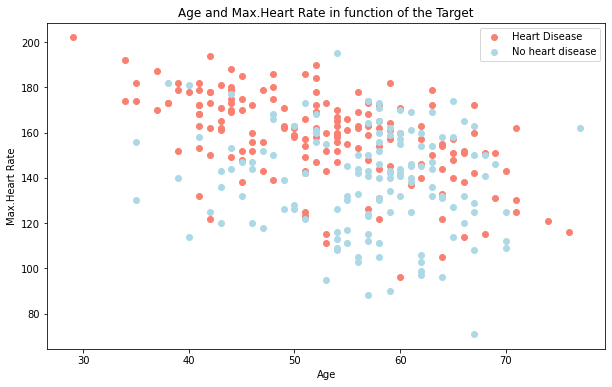

In [11]:
#Relation between age and max.heart rate(thalach) in function of the target class.

#Since we have three columns to compare, so we cant plot the crosstab.So, we proceed by drawing the scatter plot.

plt.figure(figsize=(10,6))

#Plot for patients with heart diseases
plt.scatter(data.age[data.target==1],data.thalach[data.target==1],
           color='salmon')

#Plot for patients wthout heart diseases
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],
           color='lightblue')

#Adding some features in the plot
plt.title('Age and Max.Heart Rate in function of the Target')
plt.xlabel('Age')
plt.ylabel('Max.Heart Rate')

plt.legend(['Heart Disease','No heart disease']);




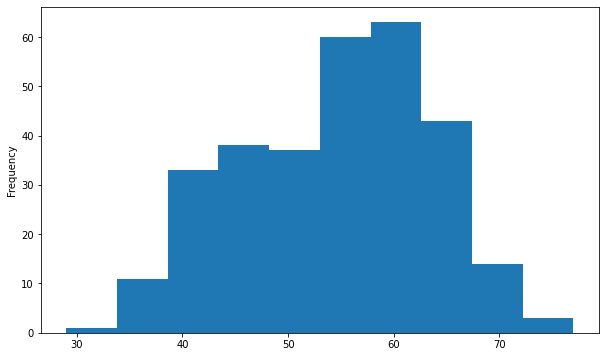

In [12]:
#Checking the distribution of the Age column in histogram

plt.figure(figsize=(10,6))
data['age'].plot(kind='hist');

#### Relation of the heart disease with the chest pain

* Typical angina: chest pain related decrease blood supply to the heart
* Atypical angina: chest pain not related to heart
* Non-anginal pain: typically esophageal spasms (non heart related)
* Asymptomatic: chest pain not showing signs of disease



In [13]:
pd.crosstab(data.cp,data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


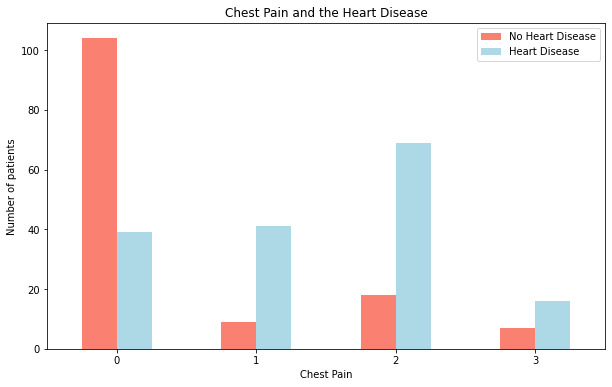

In [14]:
#Visualsing the realtion
pd.crosstab(data.cp,data.target).plot(kind='bar',
                                     figsize=(10,6),
                                    color=['salmon','lightblue'])

#Adding features to the plot
plt.title('Chest Pain and the Heart Disease')
plt.xlabel('Chest Pain')
plt.ylabel('Number of patients')

plt.xticks(rotation=0)
plt.legend(['No Heart Disease','Heart Disease']);

(14.5, -0.5)

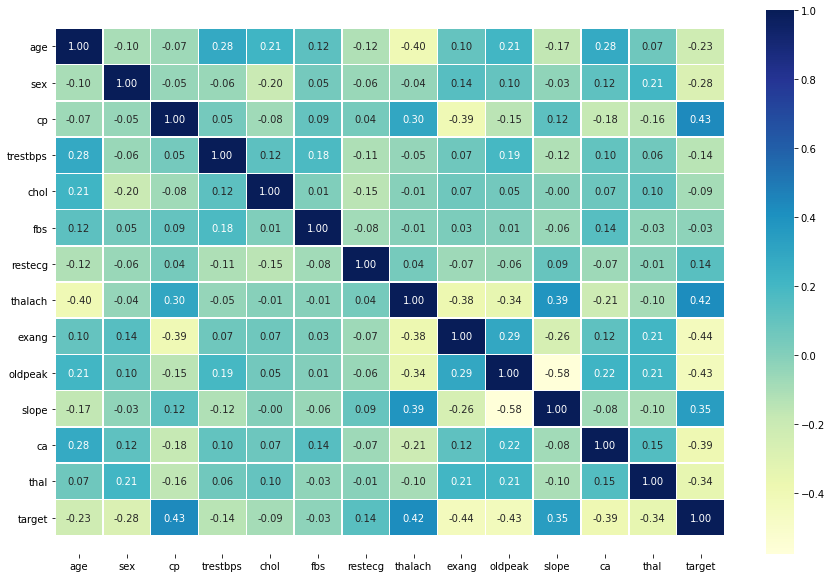

In [15]:
#Visualising the correlation among different attributes

corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
          linewidth=0.5,
          annot=True,                               # annot inserts the correlation value into the plot
          fmt='.2f',
          cmap='YlGnBu')

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

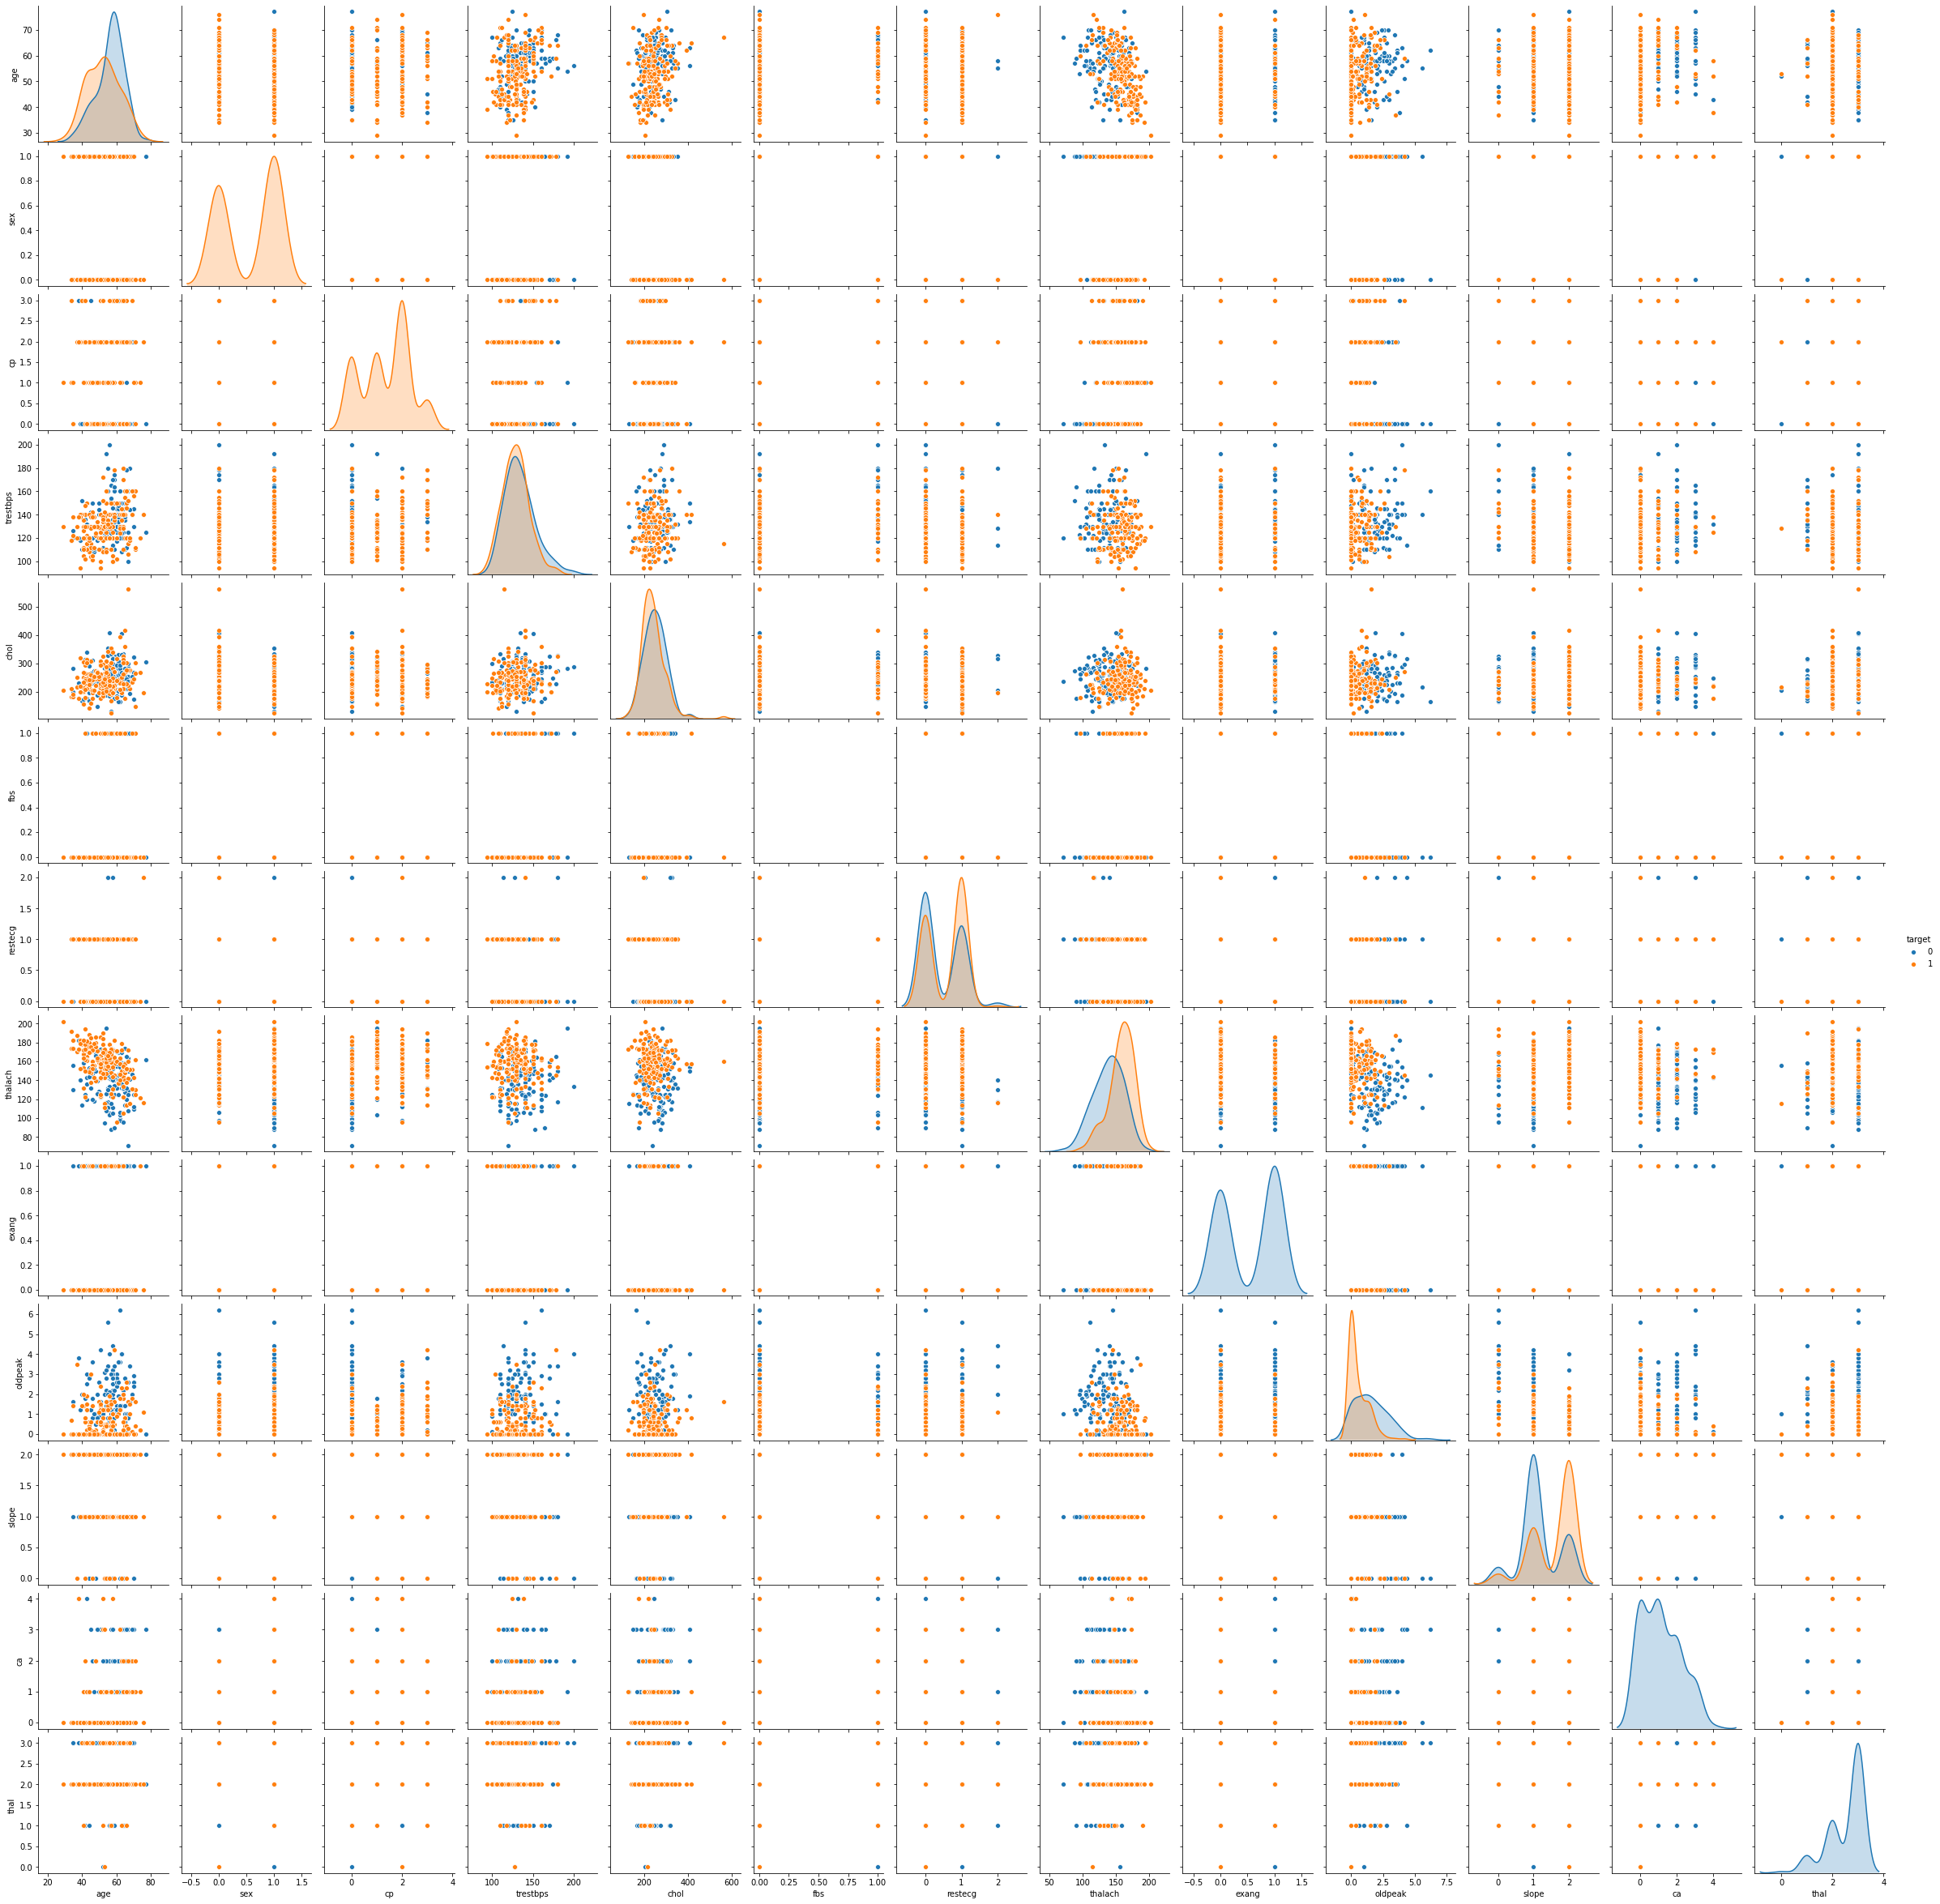

In [16]:
#Visualising the attribute relation in pairplot

sns.pairplot(data,diag_kind='kde',hue='target');

We've finished the basic EDA. Now,we'll move towards the Modelling

# Modelling

In [16]:
#Set the random seed
np.random.seed(42)

#split the data into dependent and independent variables.
X=data.drop('target',axis=1)
y=data['target']

#plitting the data into train and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
#Choosing the best models

#set random seed
np.random.seed(42)

models={'Logistic':LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'RandomForest':RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    #set a random seed
    np.random.seed(42)
    
    #define an empty dictionary
    model_scores={}
    
    #looping through the models dictionary
    for name,model in models.items():
        
        #fitting the models(generating the patterns)
        model.fit(X_train,y_train)
        
        #determining the scores(utilising the patterns)
        model_scores[name]=model.score(X_test,y_test)
        
    return model_scores
    

In [18]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

{'Logistic': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

#### Model Comaparison

In [19]:
#Creating a dataframe of the models.
model_df=pd.DataFrame(model_scores,index=['accuracy'])
model_df

,Logistic,KNN,RandomForest
accuracy,0.885246,0.688525,0.836066


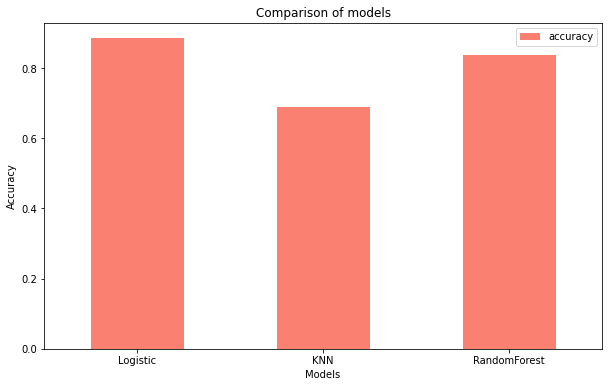

In [20]:
#Visualising the model comparison

model_df.T.plot(kind='bar',
                figsize=(10,6),
                color=['salmon'])

plt.title('Comparison of models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.xticks(rotation=0);
            

Since, we have compared different models, the accuracy for the Logistic Regression seems to be higher among all.Since, the obtained accuracy is not enough for our result,so we perform the Hyperparameter tuning.

#### Hyperparameter Tuning:
 * By hand
 * RandomizedSearchCV
 * GridSearchCV


Hyperparameter Tuning by hand on KNeighborsClassifier


In [21]:
#create empty list of train and test scores.
train_score=[]
test_score=[]

#defining the possible number of neighbors.
neighbors=range(1,20)

knn=KNeighborsClassifier()

#looping over the neighbors range
for i in neighbors:
    
    #setting neighbors into the model
    knn.set_params(n_neighbors=i)
    
    #fitting the model on train sets.
    knn.fit(X_train,y_train)
    
    #determine the model score on train and test datasets.
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))


In [22]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818]

In [23]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

The maximum score of KNN on the test data is:75.41%


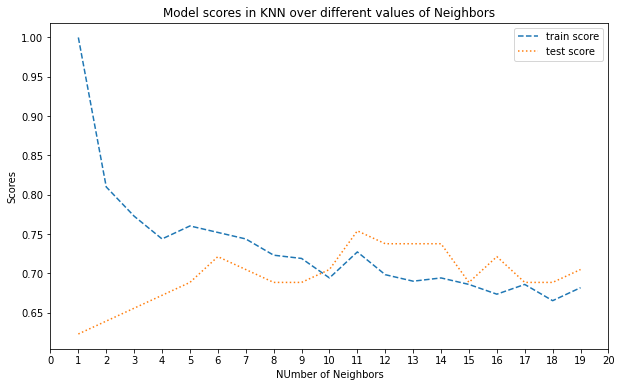

In [24]:
#Plotting the train and test scores over the number of neighbors

plt.figure(figsize=(10,6))
plt.plot(neighbors,train_score,linestyle='--',label='train score')
plt.plot(neighbors,test_score,linestyle=':',label='test score')

plt.title('Model scores in KNN over different values of Neighbors')
plt.xlabel('NUmber of Neighbors')
plt.ylabel('Scores')
plt.xticks(np.arange(21))
plt.legend();

print(f"The maximum score of KNN on the test data is:{max(test_score)*100:.2f}%")

 Hyperparameter Tuning with RandomizedSearchCV

In [25]:
#Create a hyperparameter grid for Logistic Regression
log_grid={'C':np.logspace(-4,4,20),
         'solver':['liblinear']}

#Create a hyperparameter for RandomForestClassifier
forest_grid={'n_estimators':np.arange(10,1000,50),
            'max_depth':[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)}

Now tuning the Logistic Regression

In [26]:
#Setting the random seed
np.random.seed(42)

#Setup RandomizedSearchCV for Logistic Regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             log_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
#Determining the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
#Finding the model score 
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Tuning the RandomForestClassifier

In [29]:
rs_forest=RandomizedSearchCV(RandomForestClassifier(),
                            forest_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rs_forest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
#Determining the best parameters
rs_forest.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [31]:
#Determining the score
rs_forest.score(X_test,y_test)

0.8688524590163934

Hyperparameter Tuning with GridSearchCV

In [33]:
#Since the Logistic Regression seems to have better accuracy,so we tune it by GridSearchCV.
log_grids={'C':np.logspace(-4,4,20),
            'solver':['liblinear']}
gs_log_reg=GridSearchCV(LogisticRegression(),
                       log_grids,
                       cv=5,
                       verbose=True)
#Fit the model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
#Find the best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
#Check the model score
gs_log_reg.score(X_test,y_test)

0.8852459016393442

###### Evaluation of the metrics

We have tuned our hyperparameters and now we will check the different metrics involed in the classification and compare them.

The metrics are:
 * ROC and AUC curve
 * Accuracy
 * Precision
 * Recall
 * F1
 * Confusion matrix
 * Classification report

In [37]:
#Predicting the target(i.e. using the patterns learned)
y_predicted=gs_log_reg.predict(X_test)
y_predicted

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [40]:
#Building a dataframe for the true and predicted labels.
pd.DataFrame({'True Labels':y_test,
             'Predicted Labels':y_predicted})

,True Labels,Predicted Labels
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


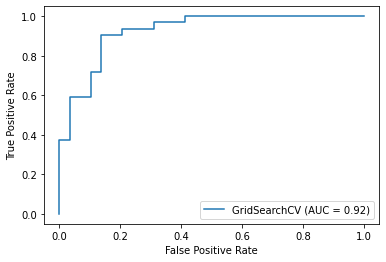

In [41]:
#Plotting ROC AUC Curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [42]:
#Checking the confusion martix
con_matrix=confusion_matrix(y_test,y_predicted)
con_matrix

array([[25,  4],
       [ 3, 29]])

In [52]:
#Plot the confusion matrix
def plot_con_matrix(y_test,y_predicted):
    
    con_matrix=confusion_matrix(y_test,y_predicted)

    fig,ax=plt.subplots(figsize=(5,3))
    ax=sns.heatmap(con_matrix,
                  linewidth=0.5,
                  annot=True,
                  cmap='viridis')

    plt.title('Confusion matrix')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
    return ax

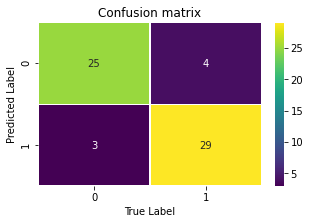

In [56]:
plot_con_matrix(y_test,y_predicted);

In [58]:
#Clasification Report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##### Evaluating the metrics by CrossValidation

In [59]:
#Best tuned hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [61]:
#Defining the model with the best obtained hyperparameters.
log_clf=LogisticRegression(C=0.23357214690901212,
                          solver='liblinear')

In [117]:
#Cross Validation For Evaluation Metrics
def evaluate_metric_cv_score(classifier,X,y,metrics):
    
    metric_cv_score=cross_val_score(classifier,
                                    X,
                                    y,
                                    cv=5,
                                    scoring=metrics)
    return metric_cv_score.mean()

In [125]:
#Determining the different metrics from the evaluate_metric_cv_score function
accuracy=evaluate_metric_cv_score(log_clf,X,y,'accuracy')
precision=evaluate_metric_cv_score(log_clf,X,y,'precision')
recall=evaluate_metric_cv_score(log_clf,X,y,'recall')
f1=evaluate_metric_cv_score(log_clf,X,y,'f1')

#Create a dictionary with metrics 
metrics_dict={'accuracy':accuracy,
             'precision':precision,
             'recall':recall,
             'f1':f1}
print(metrics_dict)

#Crearing dataframe for these metrics
metrics_df=pd.DataFrame(metrics_dict,index=['scores'])
metrics_df

{'accuracy': 0.8479781420765027, 'precision': 0.8215873015873015, 'recall': 0.9272727272727274, 'f1': 0.8705403543192143}


,accuracy,precision,recall,f1
scores,0.847978,0.821587,0.927273,0.87054


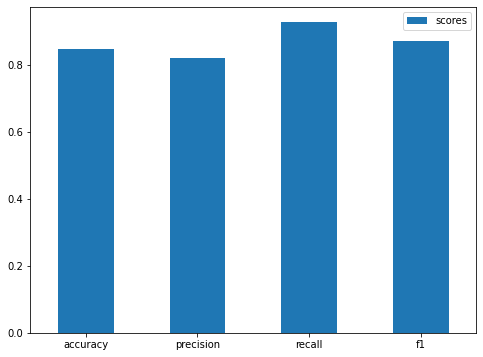

In [134]:
#Comparison of the evaluation metrics in bar plot
metrics_df.T.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation=0);

##### Feature Importance


In [135]:
#Fit the instance of Logistic Regression
log_clf=LogisticRegression(C=0.23357214690901212,
                          solver='liblinear')

log_clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [139]:
#Determining the coefficients
log_clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [162]:
#Creating a dictionary for each features with their coeffiecients
feature_dict={'age': 0.0031672721856887734,
             'sex': -0.860445816920919,
             'cp': 0.6606707303492849,
             'trestbps': -0.011569930902919925,
             'chol': -0.001663741604035976,
             'fbs': 0.04386130751482091,
             'restecg': 0.3127578715206996,
             'thalach': 0.02459360818122666,
             'exang': -0.6041303799858143,
             'oldpeak': -0.5686285194546157,
             'slope': 0.4505161679452401,
             'ca': -0.6360986316921434,
             'thal': -0.6766337521354281}
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

In [166]:
#DataFrame of the feature dictionary
feature_dict_df=pd.DataFrame(feature_dict,index=['coefficients'])
feature_dict_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
coefficients,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.60413,-0.568629,0.450516,-0.636099,-0.676634


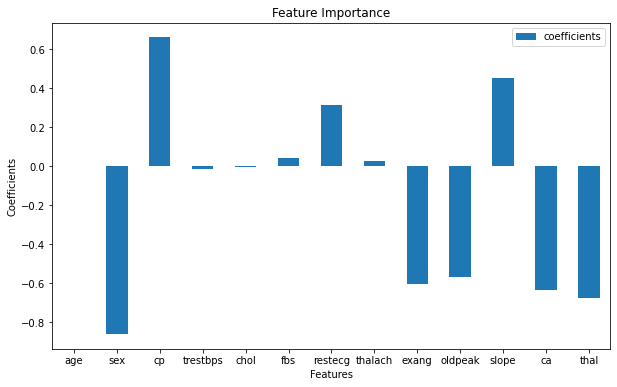

In [173]:
#Visualising the feature dictionary data frame
feature_dict_df.T.plot(kind='bar',figsize=(10,6))
plt.title('Feature Importance')
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.xticks(rotation=0);

# Experimentation

Under the expermentation, we can search for other possible ways to improvise our model.
1. Can we use the other better models like Gradient Boosters ?
2. Can we collect more data ?
3. Can we use the other metrics for the evaluation?